In [1]:
 %config Completer.use_jedi = False 

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Reading The dataset
df=pd.read_csv('ab_data.csv')

In [4]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
#Shape
df.shape

(294478, 5)

In [6]:
#Exploring the data
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [7]:
(df[df['group']=='treatment']['landing_page']!='new_page').sum()+(df[df['landing_page']=='new_page']['group']!='treatment').sum()

3893

### No Null data

In [8]:
# Cleaning the data
# Check for Null data
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

### Check for Duplicates and remove them

In [9]:
duplicated=df.user_id.duplicated().sum()
duplicated

3894

In [10]:
duplicated=df.user_id.value_counts()
duplicated
duplicated[duplicated>1]

805339    2
754884    2
722274    2
783176    2
898232    2
         ..
847058    2
889392    2
664150    2
835401    2
736955    2
Name: user_id, Length: 3894, dtype: int64

#### Remove duplicates

In [11]:
df.drop_duplicates(subset='user_id',inplace=True)

#### Check again for Duplicates

In [12]:
### Check for Duplicates
df[df.user_id.duplicated()].count

<bound method DataFrame.count of Empty DataFrame
Columns: [user_id, timestamp, group, landing_page, converted]
Index: []>

### Third : The Data Shouldn’t include users their Groups is ‘treatment’ and the landing page is ‘old_page ‘

In [13]:
#Checking the wrong data existence
treatment_error=df.query('group=="treatment" and landing_page=="old_page"')
treatment_error

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
274590,879231,2017-01-03 12:08:24.976156,treatment,old_page,0
282645,717723,2017-01-10 18:43:58.148113,treatment,old_page,0
285987,914482,2017-01-05 16:55:40.060421,treatment,old_page,0
286353,767924,2017-01-08 21:48:53.436050,treatment,old_page,0


In [14]:
df.drop(treatment_error.index,inplace=True)

In [15]:
#Checking for the error 
treatment_error=df.query('group=="treatment" and landing_page=="old_page"')
treatment_error
#No error data remaining

,user_id,timestamp,group,landing_page,converted


### Fourth The Data Shouldn’t include users their Groups is ‘control’ and the landing page is ‘new_page’ 

In [16]:
control_error=df.query('group=="control" and landing_page=="new_page"')
control_error

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
277083,731502,2017-01-16 05:54:36.502340,control,new_page,0
277283,904541,2017-01-24 12:19:25.218304,control,new_page,0
281176,828478,2017-01-13 23:45:27.822482,control,new_page,0
281593,917949,2017-01-15 03:16:02.243648,control,new_page,1


In [17]:
control_error.count()

user_id         1006
timestamp       1006
group           1006
landing_page    1006
converted       1006
dtype: int64

In [18]:
#Drop The error Data
df.drop(control_error.index,inplace=True)

In [19]:
#Check for the existence of the error again
control_error=df.query('group=="control" and landing_page=="new_page"')
control_error.count()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [20]:
df_treatment=df.query('group=="treatment"')
df_treatment

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [21]:
df_ctrl=df.query('group=="control"')
df_ctrl

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0


In [22]:
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [23]:
# 1st Method to investigate the mean

In [24]:
df[df['group']=='treatment']['converted'].mean()

0.11872721981235362

In [25]:
# 2nd Method
df.query('group=="treatment"').converted.mean()

0.11872721981235362

In [26]:
#3rd Method
df.query('group=="treatment"')['converted'].mean()

0.11872721981235362

### Creating the Null hypothesis
#### The Null hypothesis says that the rate of conversion of the treatment is equal to that of the control or smaller than it

In [27]:
# Creating 10K Sample each of the shape of the sample , to represent the whole population
diff=[]
for _ in range(10000):
    sample=df.sample(df.shape[0],replace=True)
    converted_treatment=sample.query('group=="treatment"').converted.mean()
    converted_control=sample.query('group=="control"').converted.mean()
    diff.append(converted_treatment-converted_control)


(array([   3.,   52.,  341., 1284., 2577., 2892., 1969.,  716.,  139.,
          27.]),
 array([-0.00654176, -0.0055916 , -0.00464144, -0.00369128, -0.00274112,
        -0.00179096, -0.0008408 ,  0.00010935,  0.00105951,  0.00200967,
         0.00295983]),
 <BarContainer object of 10 artists>)

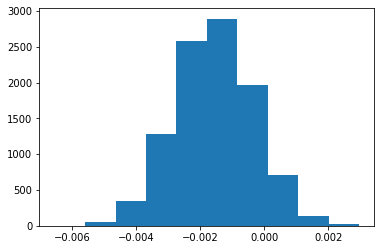

In [28]:
#Plotting the difference
plt.hist(diff)

In [29]:
# Making the mean=0
diff=np.array(diff)
diff=np.random.normal(loc=0,scale=np.std(diff),size=diff.size)

(array([  15.,  132.,  506., 1474., 2419., 2627., 1807.,  770.,  215.,
          35.]),
 array([-0.00440735, -0.00355367, -0.00269998, -0.0018463 , -0.00099262,
        -0.00013893,  0.00071475,  0.00156843,  0.00242212,  0.0032758 ,
         0.00412948]),
 <BarContainer object of 10 artists>)

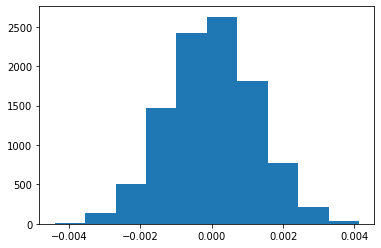

In [30]:
# Plotting the new Null
plt.hist(diff)

### Creating the alternative hypothesis
#### It says that the rate of conversion of the treatment is larger than that of the control


In [31]:
control_converted_rate=df.query('group=="control"').converted.mean()
control_converted_rate

0.12029037760181936

In [32]:
treatment_converted_rate=df.query('group=="treatment"').converted.mean()
treatment_converted_rate

0.11872721981235362

In [34]:
observed_diff=treatment_converted_rate-control_converted_rate
observed_diff

-0.0015631577894657384

### Plotting the Alternative vs Null 

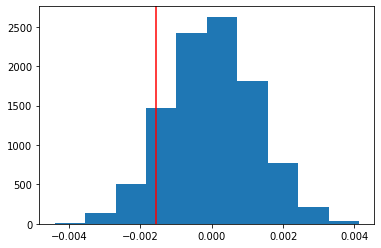

In [36]:
plt.hist(diff)
plt.axvline(x=observed_diff,c='red')

### Checking the alternative validety

In [46]:
p_value=(diff<observed_diff).mean()*100
p_value

10.37

In [ ]:
# There is 10.37% of the data in the NULL is different 